In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from csc.workbench import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


### Workbench initialization with a database path

In [2]:
batchSize = 200

pomme = False

if pomme :
    input_signals_db = f'/home/gomes/synthetic-data/constrained-signals-{batchSize}.json'

    icassp_mmp_db = f'/home/gomes/synthetic-data/icassp-mmpdf10-{batchSize}.json'
    icassp_mp_db = f'/home/gomes/synthetic-data/icassp-mp-{batchSize}.json'
    icassp_omp_db = f'/home/gomes/synthetic-data/icassp-omp-{batchSize}.json'
    
else:
    constrained_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\constrained-signals-{batchSize}.json'
    no_constrained_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\synthetic-signals-{batchSize}.json'
    
    icassp_mmp27_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-mmpdf27-{batchSize}.json'
    icassp_mmp9_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-mmpdf9-{batchSize}.json'
    icassp_mmp3_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-mmpdf3-{batchSize}.json'
    
    icassp_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-mp-{batchSize}.json'
    icassp_omp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-omp-{batchSize}.json'
    icassp_alphaCSC_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-alphaCSC-{batchSize}.json'

    no_constraint_mmp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\240724-mmpdf10-{batchSize}.json'
    no_constraint_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\240724-mp-{batchSize}.json'
    no_constraint_omp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\240724-omp-{batchSize}.json'
    

In [3]:
constrained_workbench = CSCWorkbench(constrained_signals_db)
constrained_workbench.load_data()
constrained_workbench.set_dictionary(dictionary)

Processing OMP: 100%|██████████| 3200/3200 [00:00<00:00, 4590.93it/s] 
C:\Users\gomes\Documents\ENS\00_M1\00_BORELLI\01_WorkInProgress\csc\src\csc\workbench.py:1720: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='delay',


<Figure size 1200x800 with 0 Axes>

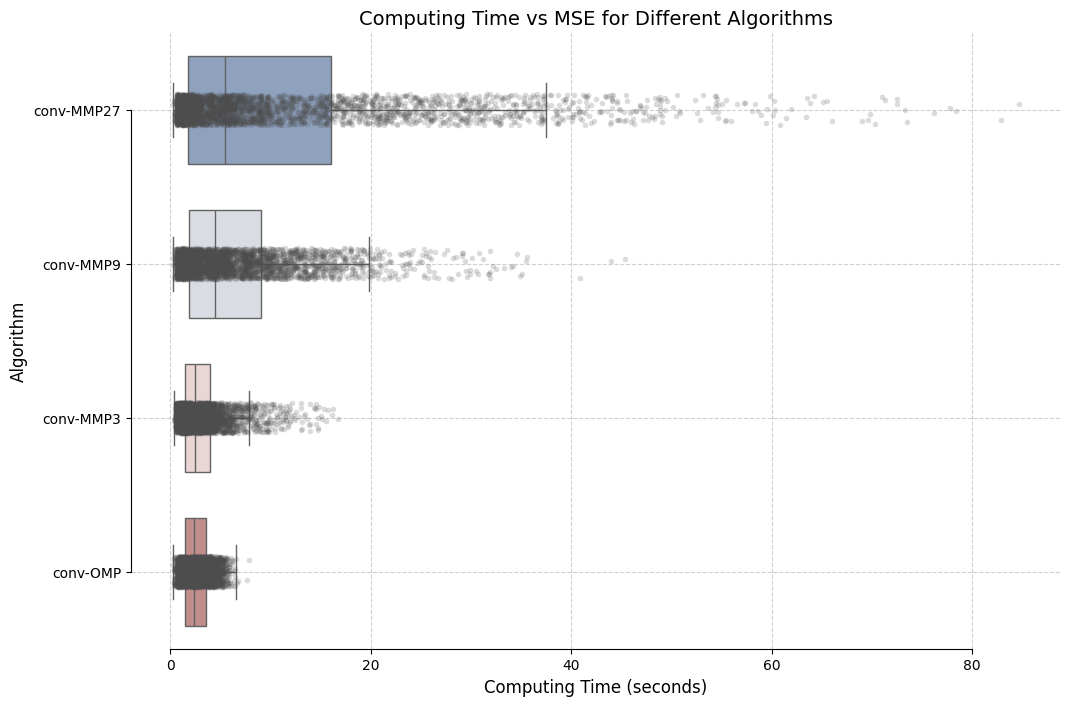

In [4]:
constrained_workbench.boxplotDelayVsMSE(
    MMP27=icassp_mmp27_db,
    MMP9=icassp_mmp9_db,
    MMP3=icassp_mmp3_db,
    OMP=icassp_omp_db
)

In [ ]:
constrained_workbench.refinedBoxplotDelayVsMSE(
    MMP27=icassp_mmp27_db,
    MMP9=icassp_mmp9_db,
    MMP3=icassp_mmp3_db,
    OMP=icassp_omp_db
)